<a href="https://colab.research.google.com/github/AtrCheema/AI4Water/blob/dev/examples/paper/visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows the use of `Visualize` class of AI4Water library. The main purpose of `Visualize` class is to assist in looking inside the model. If the model consists of layers of neural networks, then this class can help in visualing following four items

- activations/outputs of individual layers
- gradients of activations
- (trainable) weights of layers
- gradients of wieghts

If the model consists of a learned tree, then this class can be used to plot the learned decision tree with the help of `decision_tree` method.

In this notebook, we will first build a neural network consisting of two LSTM layers for a rainfall-runoff modeling problem. We will use the environmental data in a catchment of Australia as input and predict the streamflow. Then we will use the trained model, to view it using `Visualize` class.

Finally we will also build a model consisting of decision tree namely [XGBoostRegressor](https://xgboost.readthedocs.io/en/latest/python/python_intro.html) for the same problem and see the decision tree learned by the model.

In [1]:
try:
    import AI4Water
except ImportError:
    !python -m pip install "AI4Water[all] @ git+https://github.com/AtrCheema/AI4Water.git"

In [2]:
import tensorflow as tf
tf.__version__

d:\c\anaconda3\envs\tfcpu21_py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
d:\c\anaconda3\envs\tfcpu21_py37\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
d:\c\anaconda3\envs\tfcpu21_py37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


'2.1.0'

In [3]:
import numpy as np
np.__version__

'1.19.1'

In [4]:
tf.compat.v1.disable_eager_execution()

In [5]:
from ai4water import Model
from ai4water.postprocessing import Visualize

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


d:\c\anaconda3\envs\tfcpu21_py37\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



**********Pytorch models could not be imported **********



In [6]:
layers = { 
    "LSTM_0": {"units": 32, "return_sequences": True},
    "LSTM_1": {"units": 32},
    "Dense": 1,
}

input_features = ['et_morton_point_SILO',
                  'precipitation_AWAP',
                  'tmax_AWAP',
                  'tmin_AWAP',
                  'vprp_AWAP',
                  'rh_tmax_SILO',
                  'rh_tmin_SILO'
                 ]
output_features = ['streamflow_MLd_inclInfilled']

dataset_args = {'st': '20000101', 'en': '20141231', 'stations': '224206'}

In [7]:

model = Model(model={'layers': layers},
              data='CAMELS_AUS',
              input_features=input_features,
              output_features=output_features,
              dataset_args=dataset_args,
              lookback=12,
              epochs=700)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
building DL model for  regression problem using Model
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12, 7)]           0         
_________________________________________________________________
LSTM_0 (LSTM)                (None, 12, 32)            5120      
_________________________________________________________________
LSTM_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
Dense (Dense)                (None, 1)                 33        
_________________________________________________________________
output_reshaped (Reshape)    (None, 1, 1)              0         
Total params: 13,473
Trainable params: 13,473
Non-trainable params: 0
____________________________________________________

***** Training *****
input_x shape:  (3499, 12, 7)
target shape:  (3499, 1, 1)
***** Validation *****
input_x shape:  (875, 12, 7)
target shape:  (875, 1, 1)
Train on 3499 samples, validate on 875 samples
Epoch 1/700
3499/3499 [==============================] - 1s 274us/sample - loss: 1676872.4135 - nse: -0.6215 - val_loss: 3149861.4389 - val_nse: -1.0413
Epoch 2/700
3499/3499 [==============================] - 1s 150us/sample - loss: 1669427.1357 - nse: -0.5880 - val_loss: 3140905.9723 - val_nse: -0.9607
Epoch 3/700
3499/3499 [==============================] - 1s 147us/sample - loss: 1664949.9303 - nse: -0.5893 - val_loss: 3132876.5050 - val_nse: -0.9548
Epoch 4/700
3499/3499 [==============================] - 1s 145us/sample - loss: 1660745.4082 - nse: -0.5743 - val_loss: 3125114.2543 - val_nse: -0.9985
Epoch 5/700
3499/3499 [==============================] - 0s 143us/sample - loss: 1656686.7115 - nse: -0.5653 - val_loss: 3117492.3442 - val_nse: -1.0403
Epoch 6/700
3499/3499 [=======

Epoch 53/700
3499/3499 [==============================] - 1s 149us/sample - loss: 1504868.9817 - nse: -0.2881 - val_loss: 2809595.5311 - val_nse: -0.7001
Epoch 54/700
3499/3499 [==============================] - 1s 157us/sample - loss: 1502327.4947 - nse: -0.2713 - val_loss: 2803976.1123 - val_nse: -0.6580
Epoch 55/700
3499/3499 [==============================] - 1s 152us/sample - loss: 1499815.4934 - nse: -0.2729 - val_loss: 2798361.7027 - val_nse: -0.7178
Epoch 56/700
3499/3499 [==============================] - 1s 148us/sample - loss: 1497253.9232 - nse: -0.2690 - val_loss: 2792571.4677 - val_nse: -0.6676
Epoch 57/700
3499/3499 [==============================] - 1s 149us/sample - loss: 1494805.1450 - nse: -0.2600 - val_loss: 2787153.9213 - val_nse: -0.7392
Epoch 58/700
3499/3499 [==============================] - 1s 151us/sample - loss: 1492405.5502 - nse: -0.2596 - val_loss: 2781623.6986 - val_nse: -0.6841
Epoch 59/700
3499/3499 [==============================] - 1s 150us/sample - 

3499/3499 [==============================] - 1s 147us/sample - loss: 1258282.5926 - nse: 0.1659 - val_loss: 2335680.3486 - val_nse: -0.2814
Epoch 160/700
3499/3499 [==============================] - 1s 144us/sample - loss: 1255143.9865 - nse: 0.1798 - val_loss: 2327066.7514 - val_nse: -0.2909
Epoch 161/700
3499/3499 [==============================] - 1s 148us/sample - loss: 1253122.3847 - nse: 0.1838 - val_loss: 2317657.0760 - val_nse: -0.2669
Epoch 162/700
3499/3499 [==============================] - 1s 144us/sample - loss: 1253067.7967 - nse: 0.1763 - val_loss: 2325373.3577 - val_nse: -0.2851
Epoch 163/700
3499/3499 [==============================] - 1s 145us/sample - loss: 1251002.8157 - nse: 0.1725 - val_loss: 2310380.9947 - val_nse: -0.2646
Epoch 164/700
3499/3499 [==============================] - 1s 145us/sample - loss: 1249207.0828 - nse: 0.1808 - val_loss: 2317925.6091 - val_nse: -0.2594
Epoch 165/700
3499/3499 [==============================] - 1s 148us/sample - loss: 1246653

3499/3499 [==============================] - 1s 146us/sample - loss: 1170202.3025 - nse: 0.3181 - val_loss: 2184091.2206 - val_nse: -0.1624
Epoch 213/700
3499/3499 [==============================] - 1s 145us/sample - loss: 1167891.3969 - nse: 0.3102 - val_loss: 2176972.1669 - val_nse: -0.1308
Epoch 214/700
3499/3499 [==============================] - 1s 148us/sample - loss: 1166522.9298 - nse: 0.3102 - val_loss: 2168694.0646 - val_nse: -0.1325
Epoch 215/700
3499/3499 [==============================] - 1s 149us/sample - loss: 1167796.2783 - nse: 0.3018 - val_loss: 2189436.8124 - val_nse: -0.1584
Epoch 216/700
3499/3499 [==============================] - 1s 146us/sample - loss: 1163385.9825 - nse: 0.3292 - val_loss: 2162648.8717 - val_nse: -0.1230
Epoch 217/700
3499/3499 [==============================] - 1s 147us/sample - loss: 1161981.5147 - nse: 0.3326 - val_loss: 2179429.1414 - val_nse: -0.1430
Epoch 218/700
3499/3499 [==============================] - 1s 147us/sample - loss: 1161692

3499/3499 [==============================] - 1s 147us/sample - loss: 1038253.6953 - nse: 0.5035 - val_loss: 1930554.5897 - val_nse: 0.0679
Epoch 319/700
3499/3499 [==============================] - 1s 144us/sample - loss: 1036460.2778 - nse: 0.5141 - val_loss: 1895974.8174 - val_nse: 0.0898
Epoch 320/700
3499/3499 [==============================] - 1s 146us/sample - loss: 1034887.5209 - nse: 0.5171 - val_loss: 1942536.6914 - val_nse: 0.0486
Epoch 321/700
3499/3499 [==============================] - 1s 145us/sample - loss: 1034860.5248 - nse: 0.5237 - val_loss: 1913585.4071 - val_nse: 0.0798
Epoch 322/700
3499/3499 [==============================] - 1s 144us/sample - loss: 1033804.3681 - nse: 0.5039 - val_loss: 2006669.5570 - val_nse: -0.0108
Epoch 323/700
3499/3499 [==============================] - 1s 145us/sample - loss: 1034986.2365 - nse: 0.5170 - val_loss: 1909017.8397 - val_nse: 0.0830
Epoch 324/700
3499/3499 [==============================] - 1s 148us/sample - loss: 1031618.8669

Epoch 372/700
3499/3499 [==============================] - 1s 150us/sample - loss: 989568.5592 - nse: 0.5746 - val_loss: 1874122.4188 - val_nse: 0.0957
Epoch 373/700
3499/3499 [==============================] - 1s 146us/sample - loss: 986151.3432 - nse: 0.5863 - val_loss: 1861713.8348 - val_nse: 0.1204
Epoch 374/700
3499/3499 [==============================] - 1s 146us/sample - loss: 984382.0031 - nse: 0.5894 - val_loss: 2002039.0516 - val_nse: -0.0349
Epoch 375/700
3499/3499 [==============================] - 1s 147us/sample - loss: 996345.2752 - nse: 0.5628 - val_loss: 1816724.4013 - val_nse: 0.1383
Epoch 376/700
3499/3499 [==============================] - 1s 150us/sample - loss: 983155.4650 - nse: 0.5905 - val_loss: 1875453.9238 - val_nse: 0.0947
Epoch 377/700
3499/3499 [==============================] - 1s 148us/sample - loss: 982958.1910 - nse: 0.6080 - val_loss: 1839805.4856 - val_nse: 0.1318
Epoch 378/700
3499/3499 [==============================] - 1s 146us/sample - loss: 9809

Epoch 426/700
3499/3499 [==============================] - 1s 146us/sample - loss: 942369.7373 - nse: 0.6428 - val_loss: 1774931.7769 - val_nse: 0.1847
Epoch 427/700
3499/3499 [==============================] - 1s 146us/sample - loss: 941668.8834 - nse: 0.6504 - val_loss: 1774303.6283 - val_nse: 0.1734
Epoch 428/700
3499/3499 [==============================] - 1s 144us/sample - loss: 940906.6386 - nse: 0.6626 - val_loss: 1781954.4366 - val_nse: 0.1703
Epoch 429/700
3499/3499 [==============================] - 1s 145us/sample - loss: 940344.1003 - nse: 0.6504 - val_loss: 1755801.2089 - val_nse: 0.1873
Epoch 430/700
3499/3499 [==============================] - 1s 145us/sample - loss: 940747.8158 - nse: 0.6359 - val_loss: 1794881.4604 - val_nse: 0.1515
Epoch 431/700
3499/3499 [==============================] - 1s 147us/sample - loss: 939789.4249 - nse: 0.6619 - val_loss: 1798905.1889 - val_nse: 0.1600
Epoch 432/700
3499/3499 [==============================] - 1s 146us/sample - loss: 95161

Epoch 480/700
3499/3499 [==============================] - 1s 145us/sample - loss: 906998.8258 - nse: 0.7021 - val_loss: 1732202.2734 - val_nse: 0.2405
Epoch 481/700
3499/3499 [==============================] - 1s 147us/sample - loss: 906255.6220 - nse: 0.6897 - val_loss: 1697303.2377 - val_nse: 0.2342
Epoch 482/700
3499/3499 [==============================] - 1s 146us/sample - loss: 906366.7338 - nse: 0.6939 - val_loss: 1665219.1543 - val_nse: 0.2750
Epoch 483/700
3499/3499 [==============================] - 1s 146us/sample - loss: 905900.8225 - nse: 0.6999 - val_loss: 1688698.3567 - val_nse: 0.2315
Epoch 484/700
3499/3499 [==============================] - 1s 146us/sample - loss: 905805.7518 - nse: 0.7020 - val_loss: 1659615.1846 - val_nse: 0.2624
Epoch 485/700
3499/3499 [==============================] - 1s 147us/sample - loss: 904488.7125 - nse: 0.7025 - val_loss: 1694706.3143 - val_nse: 0.2458
Epoch 486/700
3499/3499 [==============================] - 1s 145us/sample - loss: 90341

Epoch 534/700
3499/3499 [==============================] - 1s 147us/sample - loss: 882487.8150 - nse: 0.7105 - val_loss: 1667323.7429 - val_nse: 0.2496
Epoch 535/700
3499/3499 [==============================] - 1s 144us/sample - loss: 880099.6148 - nse: 0.7182 - val_loss: 1671484.8916 - val_nse: 0.2357
Epoch 536/700
3499/3499 [==============================] - 1s 147us/sample - loss: 876826.3541 - nse: 0.7288 - val_loss: 1633430.6526 - val_nse: 0.2621
Epoch 537/700
3499/3499 [==============================] - 1s 147us/sample - loss: 875952.2181 - nse: 0.7342 - val_loss: 1695526.9844 - val_nse: 0.2360
Epoch 538/700
3499/3499 [==============================] - 1s 145us/sample - loss: 875376.3917 - nse: 0.7277 - val_loss: 1649022.2740 - val_nse: 0.2555
Epoch 539/700
3499/3499 [==============================] - 1s 144us/sample - loss: 875904.0456 - nse: 0.7278 - val_loss: 1723540.2742 - val_nse: 0.1901
Epoch 540/700
3499/3499 [==============================] - 1s 146us/sample - loss: 87708

Epoch 588/700
3499/3499 [==============================] - 1s 148us/sample - loss: 852014.3618 - nse: 0.7472 - val_loss: 1609769.7401 - val_nse: 0.2470
Epoch 589/700
3499/3499 [==============================] - 1s 149us/sample - loss: 851480.7359 - nse: 0.7574 - val_loss: 1659680.2146 - val_nse: 0.2450
Epoch 590/700
3499/3499 [==============================] - 1s 145us/sample - loss: 850580.9372 - nse: 0.7572 - val_loss: 1668801.9144 - val_nse: 0.2512
Epoch 591/700
3499/3499 [==============================] - 1s 148us/sample - loss: 850050.0238 - nse: 0.7640 - val_loss: 1627703.4897 - val_nse: 0.2824
Epoch 592/700
3499/3499 [==============================] - 1s 146us/sample - loss: 849382.6699 - nse: 0.7565 - val_loss: 1611073.7371 - val_nse: 0.2785
Epoch 593/700
3499/3499 [==============================] - 1s 147us/sample - loss: 848757.3284 - nse: 0.7554 - val_loss: 1641016.2715 - val_nse: 0.2385
Epoch 594/700
3499/3499 [==============================] - 1s 149us/sample - loss: 84843

Epoch 642/700
3499/3499 [==============================] - 1s 146us/sample - loss: 829001.8105 - nse: 0.7800 - val_loss: 1621643.2146 - val_nse: 0.2261
Epoch 643/700
3499/3499 [==============================] - 1s 147us/sample - loss: 828436.2662 - nse: 0.7784 - val_loss: 1644749.4278 - val_nse: 0.2580
Epoch 644/700
3499/3499 [==============================] - 1s 147us/sample - loss: 827904.0002 - nse: 0.7772 - val_loss: 1579145.1387 - val_nse: 0.2981
Epoch 645/700
3499/3499 [==============================] - 1s 146us/sample - loss: 827217.9348 - nse: 0.7820 - val_loss: 1581248.2740 - val_nse: 0.3058
Epoch 646/700
3499/3499 [==============================] - 1s 148us/sample - loss: 834899.1937 - nse: 0.7700 - val_loss: 1533868.1305 - val_nse: 0.3518
Epoch 647/700
3499/3499 [==============================] - 1s 147us/sample - loss: 856694.8856 - nse: 0.6951 - val_loss: 1510319.6897 - val_nse: 0.3527
Epoch 648/700
3499/3499 [==============================] - 1s 144us/sample - loss: 83734

Epoch 696/700
3499/3499 [==============================] - 1s 146us/sample - loss: 808192.7124 - nse: 0.8090 - val_loss: 1587809.4181 - val_nse: 0.2938
Epoch 697/700
3499/3499 [==============================] - 1s 146us/sample - loss: 807436.9371 - nse: 0.8018 - val_loss: 1573507.8167 - val_nse: 0.2878
Epoch 698/700
3499/3499 [==============================] - 1s 145us/sample - loss: 806797.4871 - nse: 0.7973 - val_loss: 1587841.6769 - val_nse: 0.2951
Epoch 699/700
3499/3499 [==============================] - 1s 150us/sample - loss: 806119.0996 - nse: 0.8042 - val_loss: 1576248.6227 - val_nse: 0.2957
Epoch 700/700
3499/3499 [==============================] - 1s 146us/sample - loss: 805858.7515 - nse: 0.8057 - val_loss: 1573714.3527 - val_nse: 0.3322


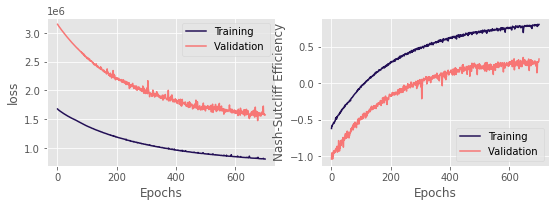

********** Successfully loaded weights from weights_675_1474320.72306.hdf5 file **********


In [8]:
h = model.fit()

***** Test *****
input_x shape:  (1094, 12, 7)
target shape:  (1094, 1, 1)
1094/1094 [==============================] - 0s 123us/sample


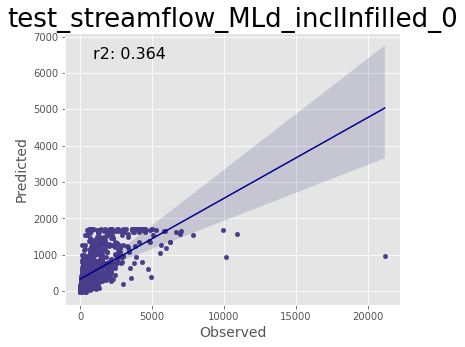

D:\mytools\AI4Water\ai4water\utils\visualizations.py:189: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  axis.plot(true, style, color='b', marker='o', fillstyle='none',  markersize=ms, label='True')
D:\mytools\AI4Water\ai4water\utils\visualizations.py:199: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.xticks(fontsize=18)
D:\mytools\AI4Water\ai4water\utils\plotting_tools.py:433: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(fname, dpi=dpi, bbox_inches=bbox_inches)
d:\c\anaconda3\envs\tfcpu21_py37\lib\site-packages\scipy\stats\stats.py:410: RuntimeWa

array([[[134.1759 ]],

       [[200.97417]],

       [[229.4464 ]],

       ...,

       [[371.07123]],

       [[400.93768]],

       [[422.73993]]], dtype=float32)

d:\c\anaconda3\envs\tfcpu21_py37\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(bytes_io, **kw)


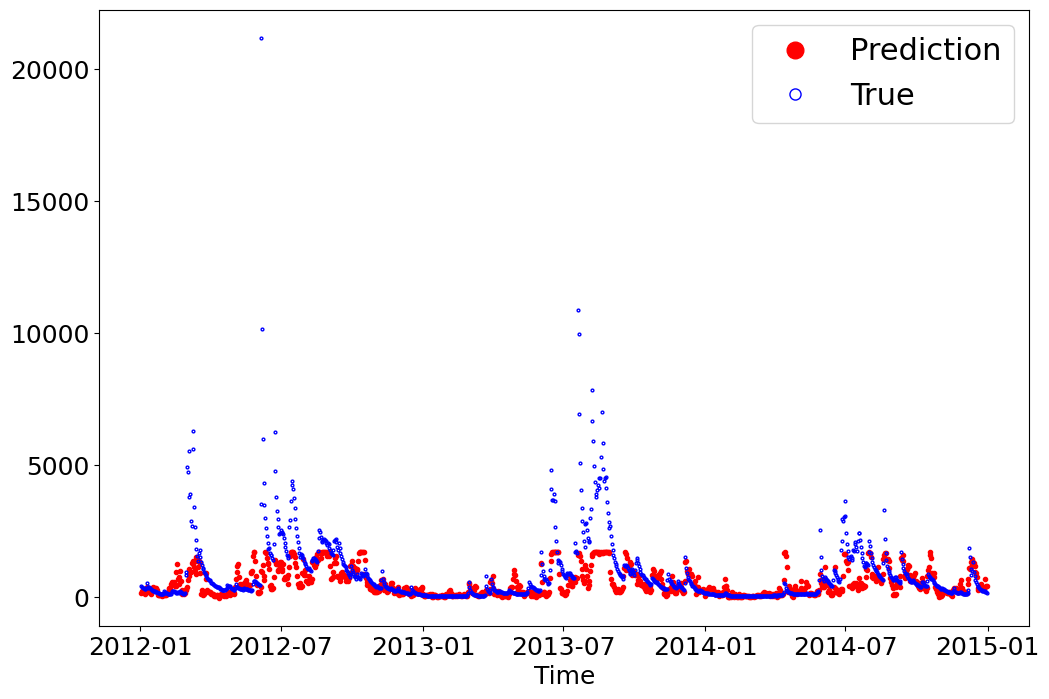

In [9]:
model.predict()

***** Training *****
input_x shape:  (3499, 12, 7)
target shape:  (3499, 1, 1)
3499/3499 [==============================] - 0s 48us/sample


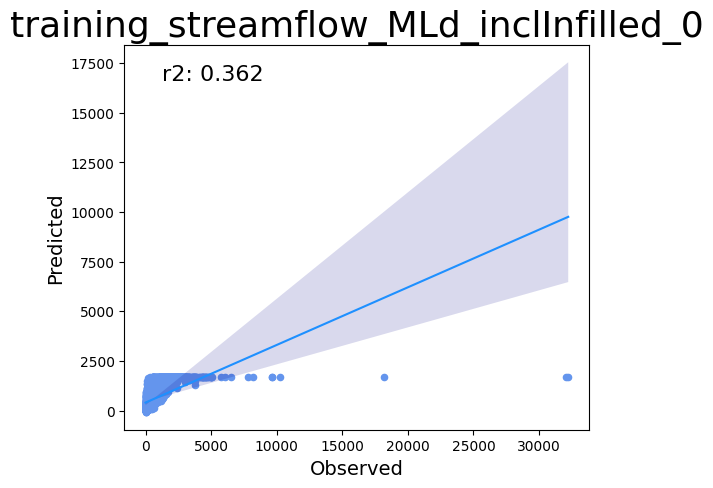

D:\mytools\AI4Water\ai4water\utils\visualizations.py:189: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  axis.plot(true, style, color='b', marker='o', fillstyle='none',  markersize=ms, label='True')
D:\mytools\AI4Water\ai4water\post_processing\SeqMetrics\_regression.py:648: RuntimeWarning: divide by zero encountered in true_divide
  return float(np.mean(np.abs((self.true - self.predicted) / self.true)) * 100)
d:\c\anaconda3\envs\tfcpu21_py37\lib\site-packages\scipy\stats\stats.py:410: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)
d:\c\anaconda3\envs\tfcpu21_py37\lib\site-packages\scipy\stats\stats.py:410: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


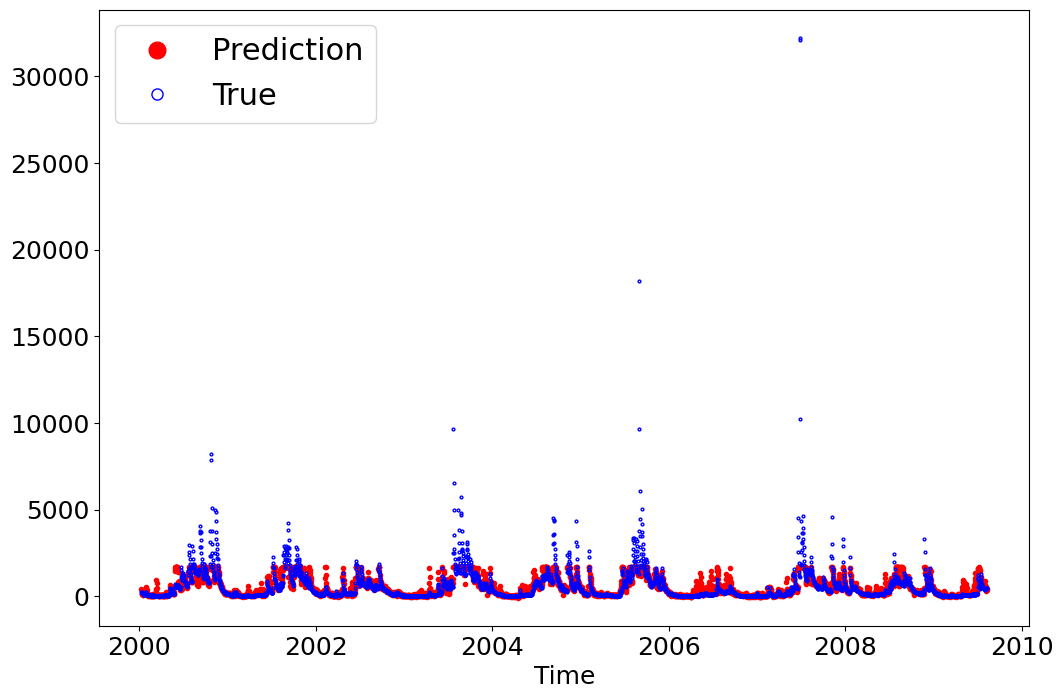

In [10]:
t,p = model.predict('training', return_true=True)

In [11]:
np.argmax(p)

2039

In [12]:
visualizer = Visualize(model)

# LSTM_0 layer

We will first look at the `LSTM_0` layer which is the first LSTM layer.

## activations

***** Training *****
input_x shape:  (3499, 12, 7)
target shape:  (3499, 1, 1)
Plotting activations of layers


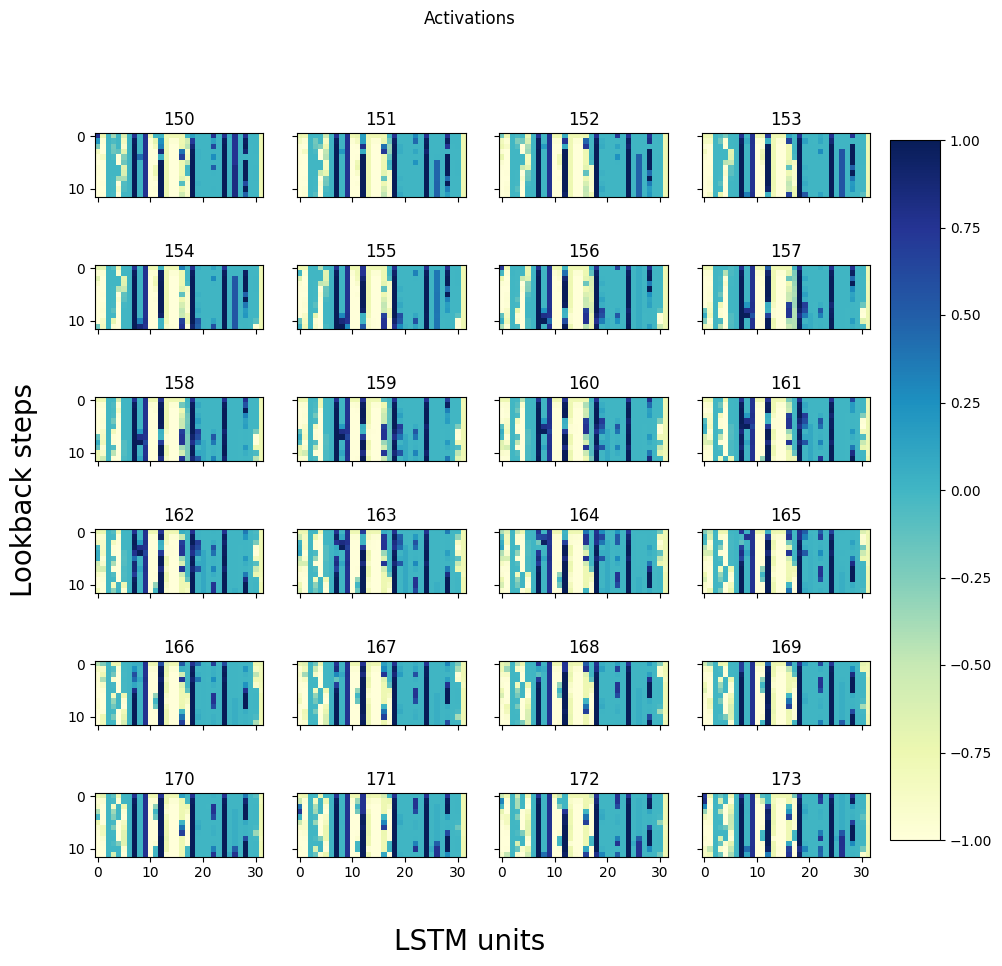

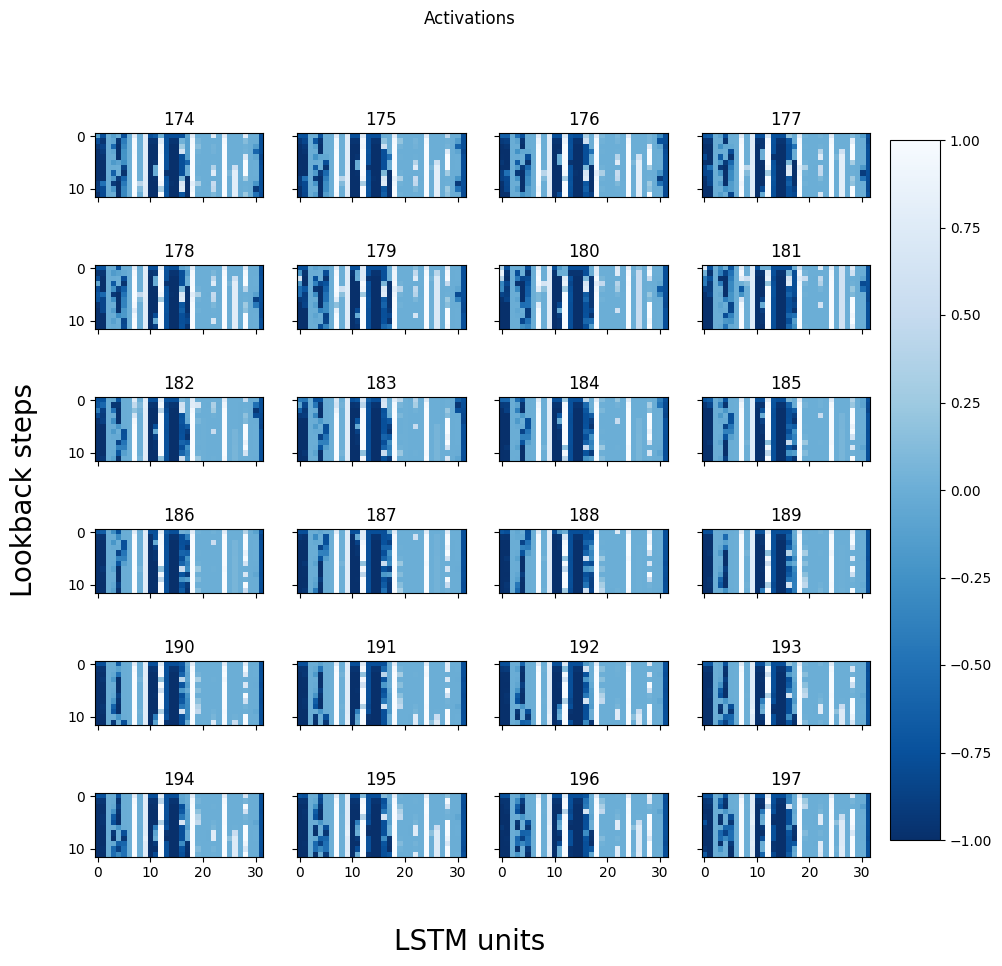

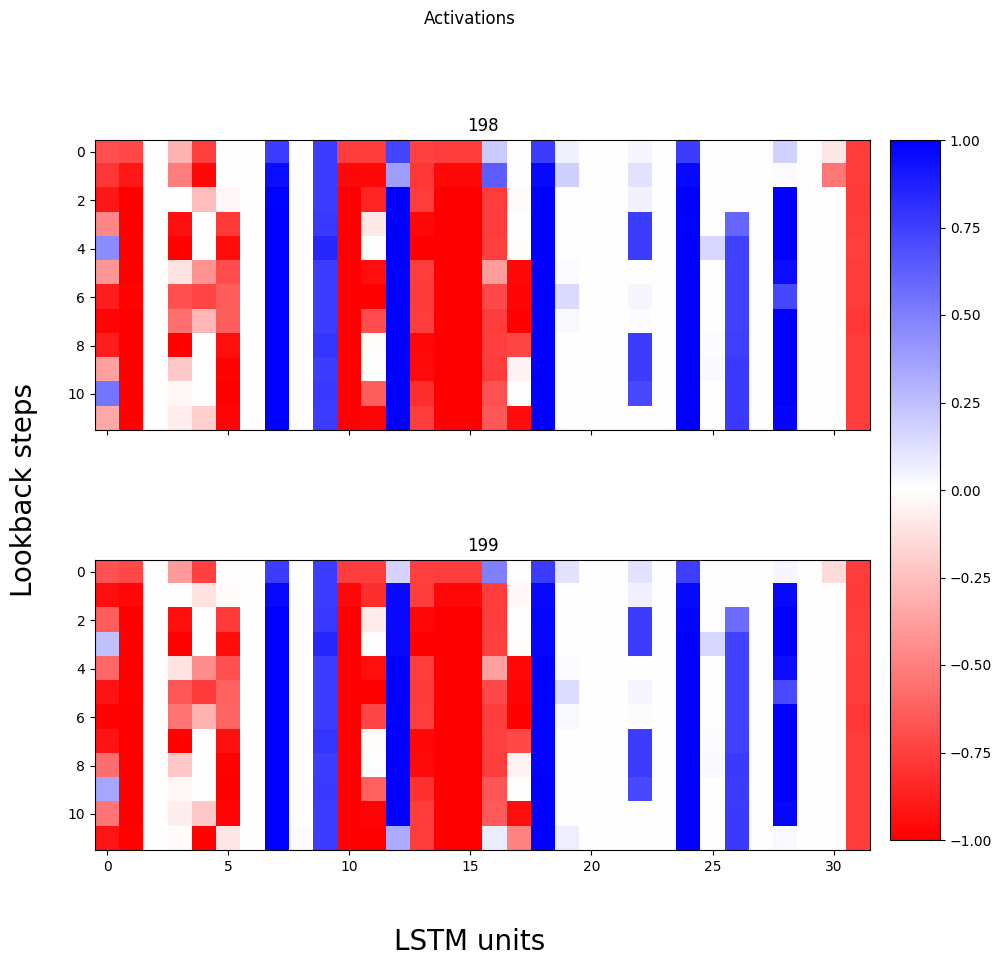

In [13]:
visualizer.activations(layer_name="LSTM_0", examples_to_use=range(150, 200))

## gradients of activations

***** Training *****
input_x shape:  (3499, 12, 7)
target shape:  (3499, 1, 1)
Plotting gradients of activations of layersr


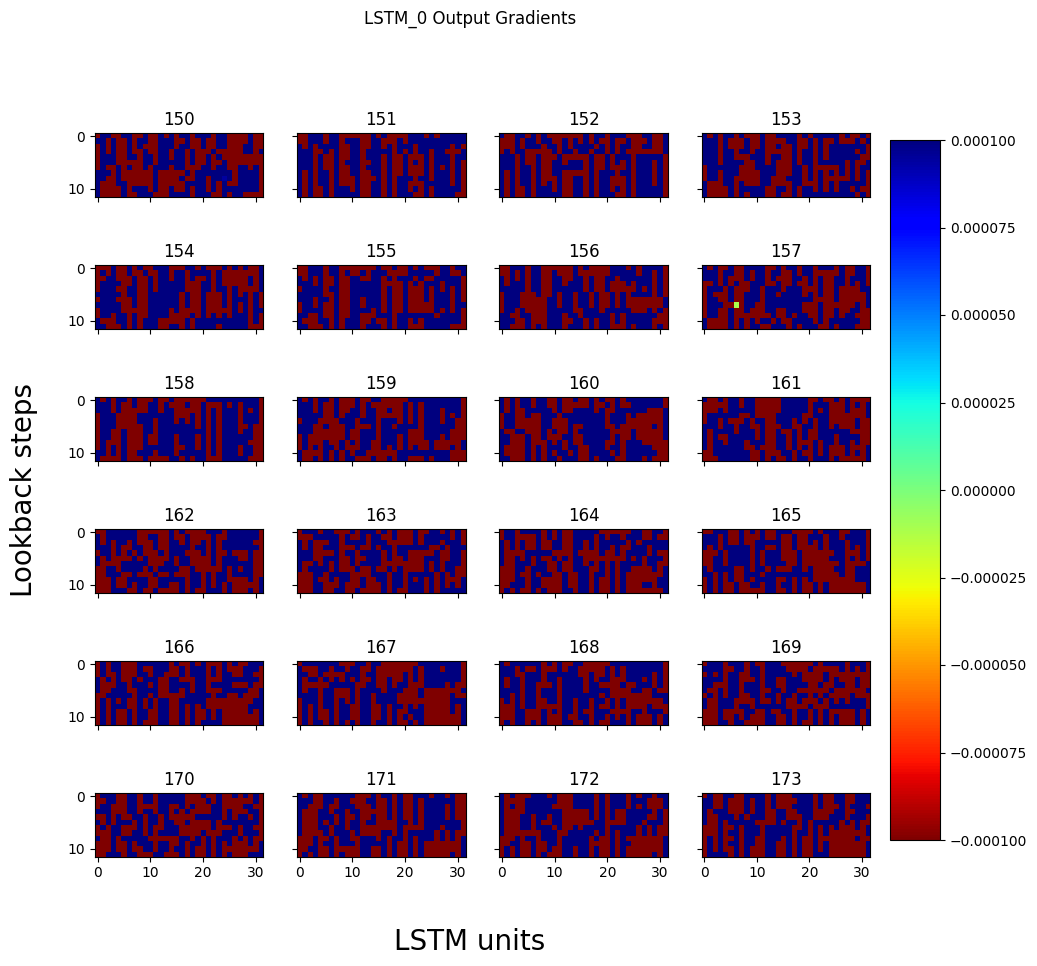

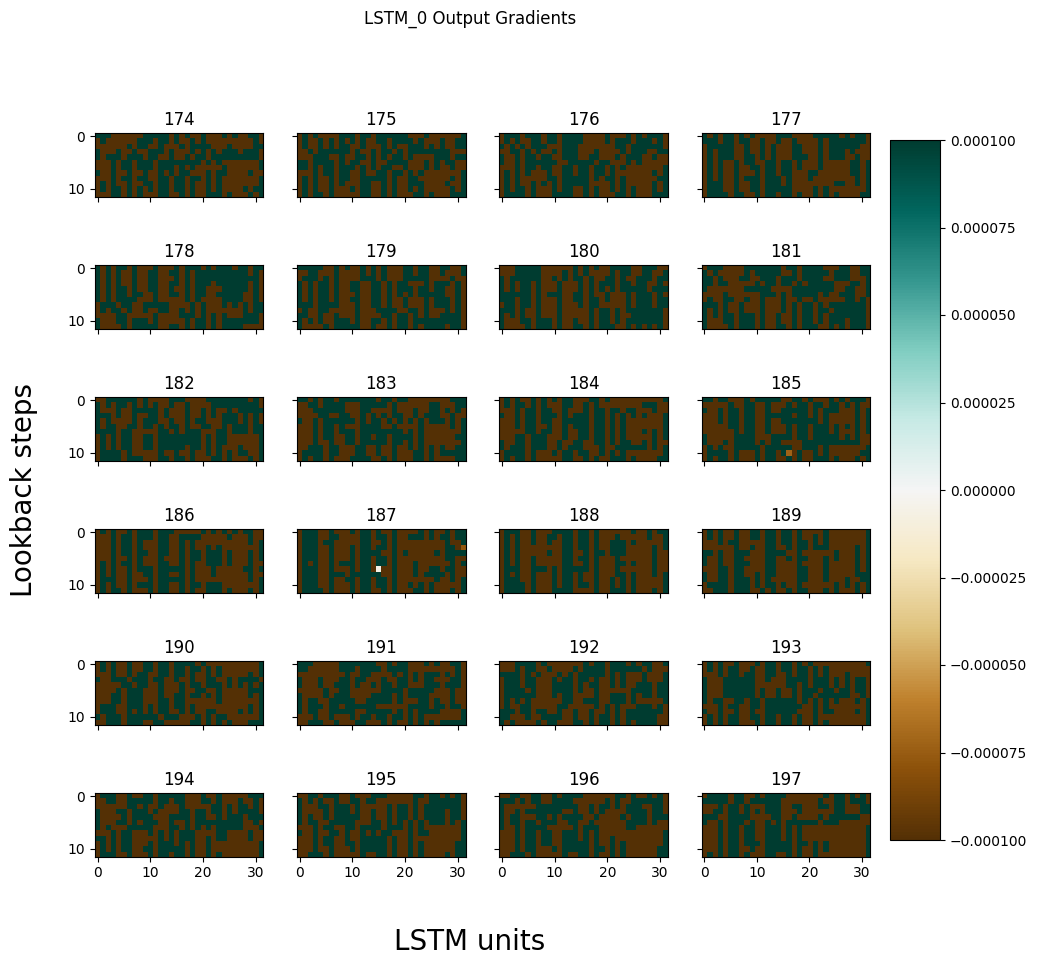

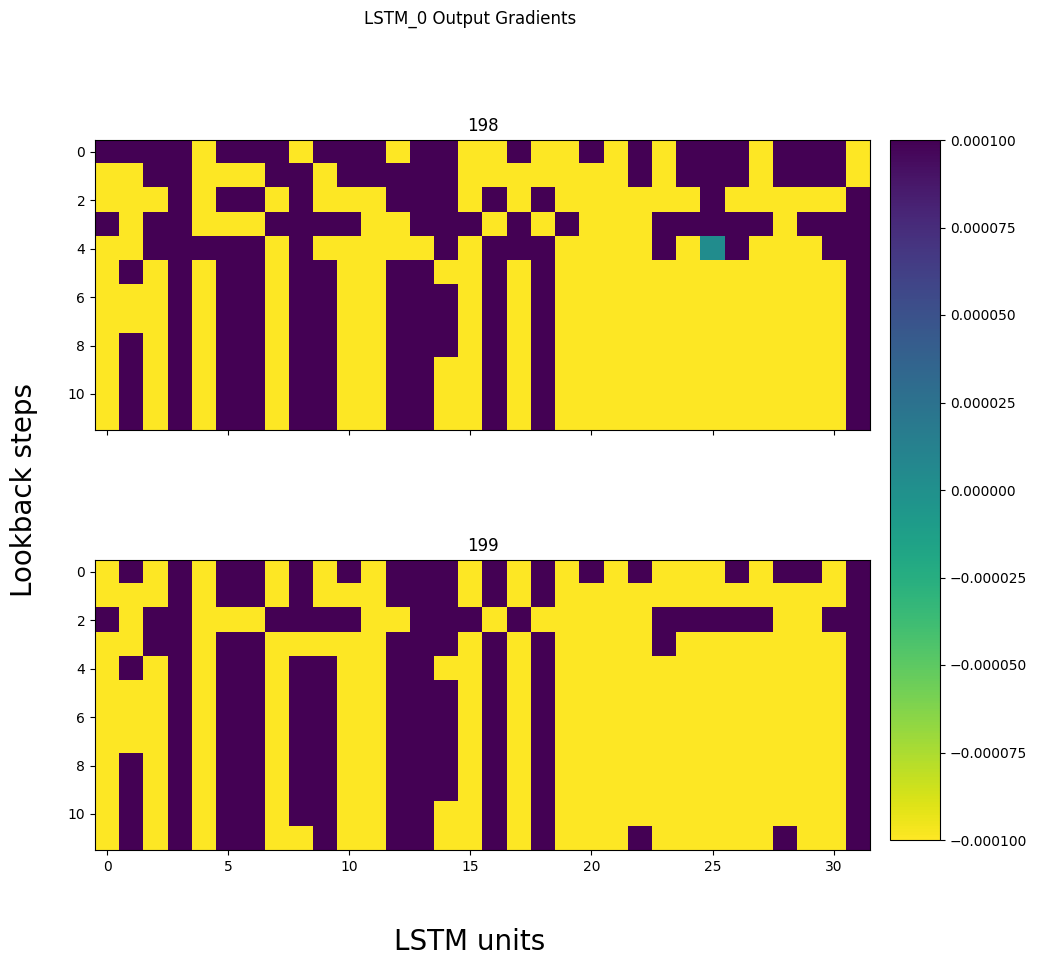

In [14]:
visualizer.activation_gradients("LSTM_0", examples_to_use=range(150, 200))

## weights

Plotting trainable weights of layers of the model.


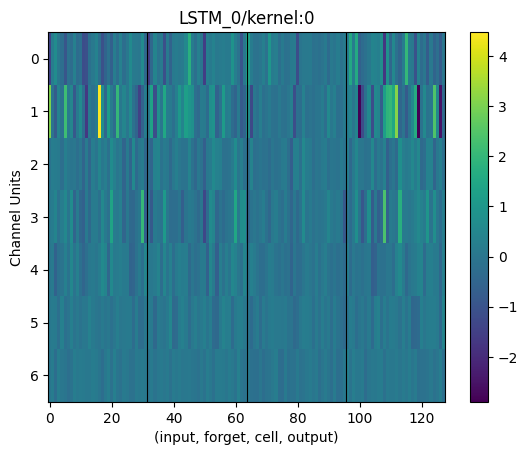

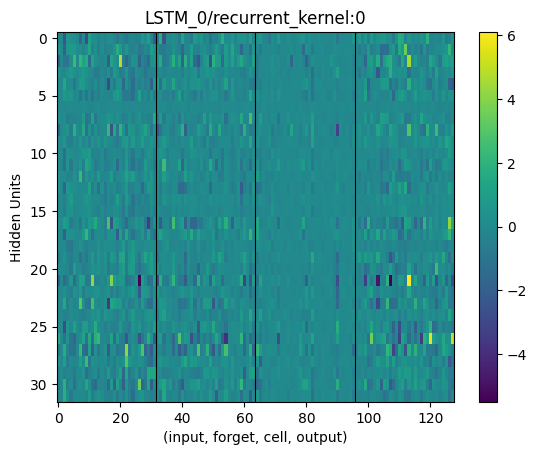

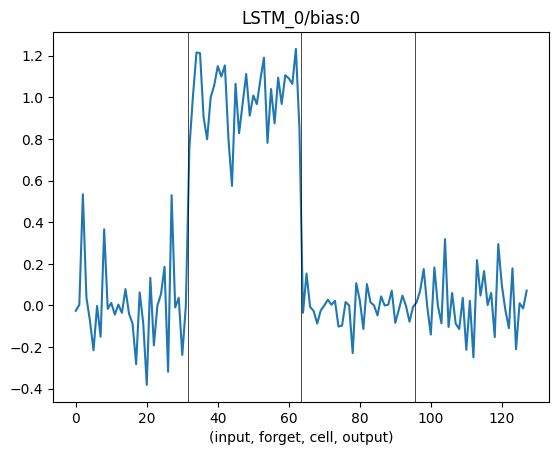

In [15]:
visualizer.weights(layer_name="LSTM_0", show=True)

## gradients of weights

***** Training *****
input_x shape:  (3499, 12, 7)
target shape:  (3499, 1, 1)
Plotting gradients of trainable weights


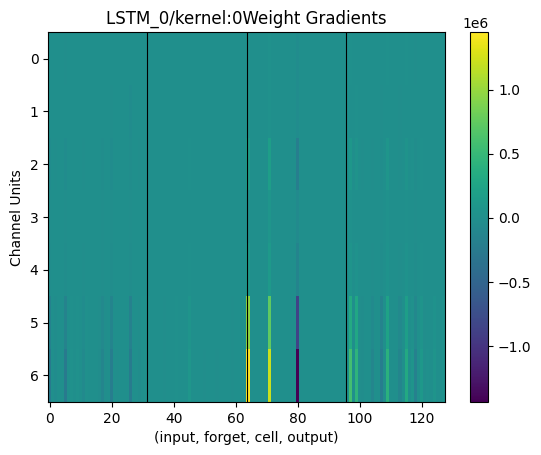

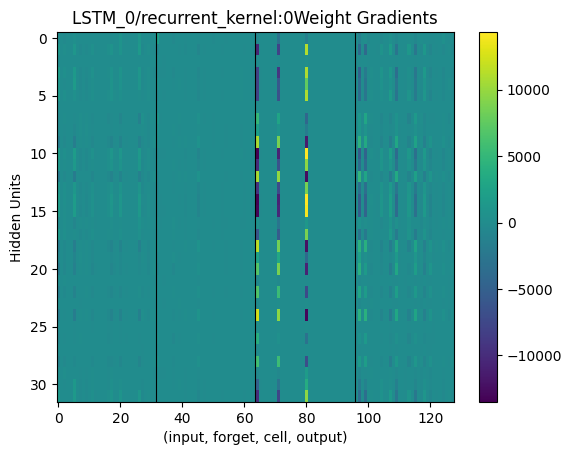

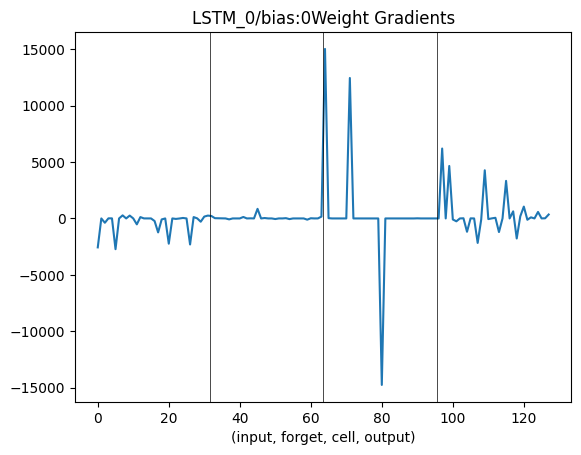

In [16]:
visualizer.weight_gradients(layer_name="LSTM_0", show=True)

# LSTM_1 layer

## activations

***** Training *****
input_x shape:  (3499, 12, 7)
target shape:  (3499, 1, 1)
Plotting activations of layers


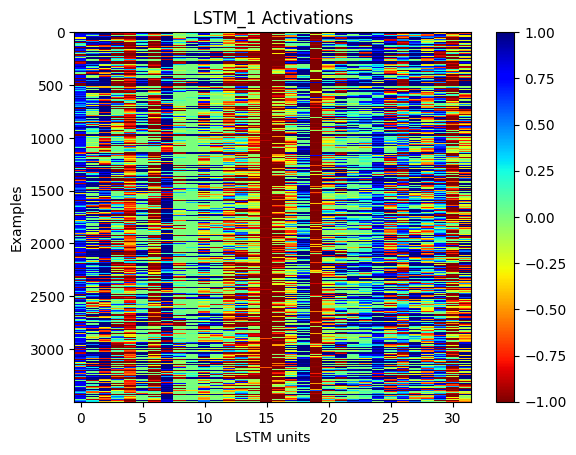

In [17]:
visualizer.activations(layer_name="LSTM_1", show=True)

## gradients of activations

***** Training *****
input_x shape:  (3499, 12, 7)
target shape:  (3499, 1, 1)
Plotting gradients of activations of layersr


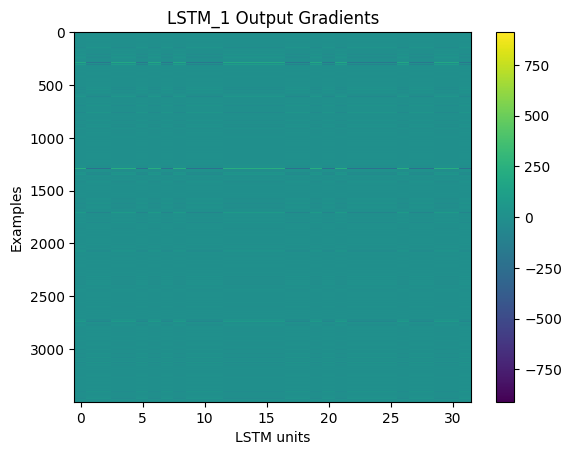

In [18]:
visualizer.activation_gradients("LSTM_1", show=True)

## weights

Plotting trainable weights of layers of the model.


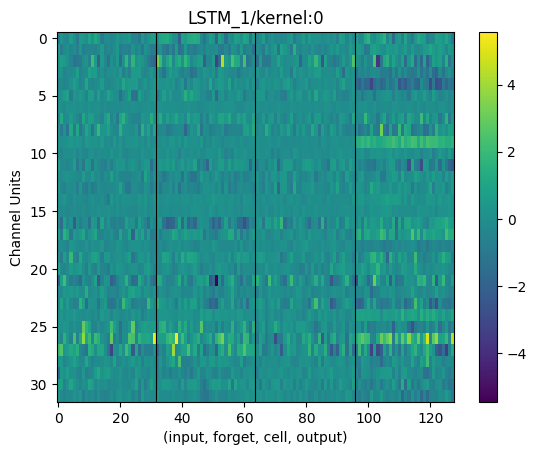

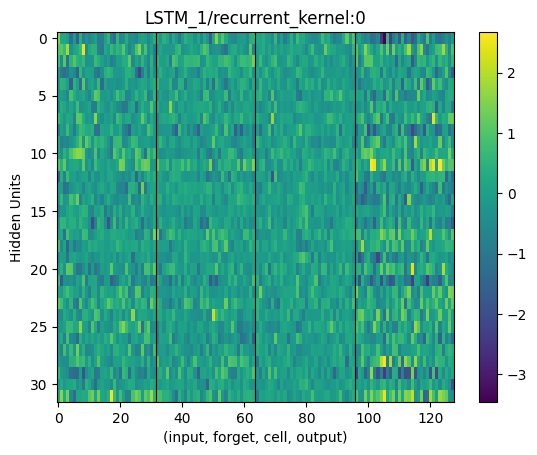

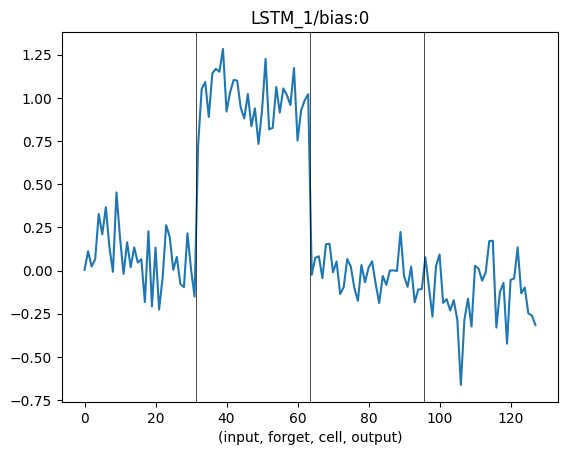

In [19]:
visualizer.weights(layer_name="LSTM_1", show=True)

## gradients of weights

***** Training *****
input_x shape:  (3499, 12, 7)
target shape:  (3499, 1, 1)
Plotting gradients of trainable weights


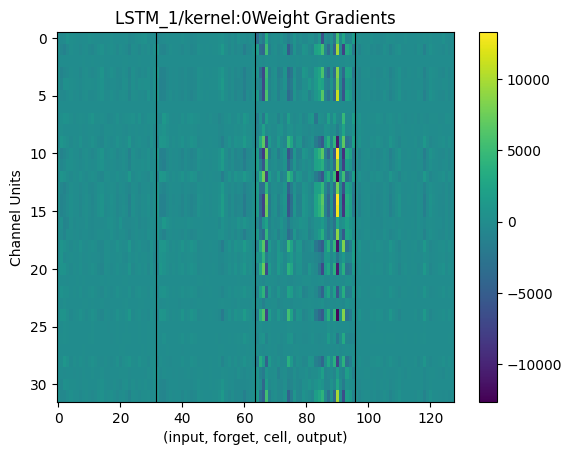

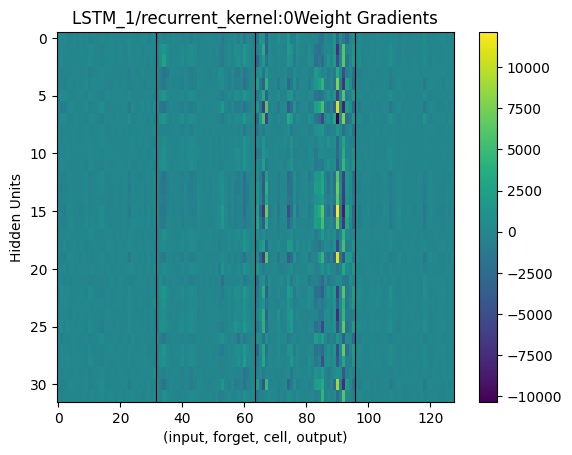

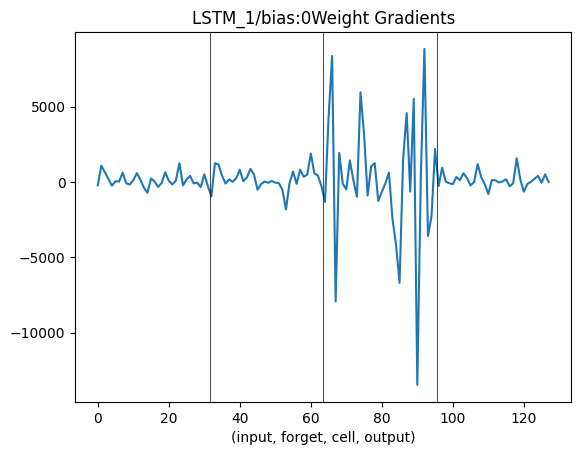

In [20]:
visualizer.weight_gradients(layer_name="LSTM_1", show=True)

Now we will build a machine learning mdoel for this same purpose.

In [21]:
model = Model(model="XGBRegressor",
              data='CAMELS_AUS',
              input_features=input_features,
              output_features=output_features,
              dataset_args=dataset_args,
              )

building ML model for  regression problem using XGBoostRegressor


In [22]:
model.fit()

***** Training *****
input_x shape:  (3506, 7)
target shape:  (3506, 1, 1)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

***** Test *****
input_x shape:  (1096, 7)
target shape:  (1096, 1, 1)


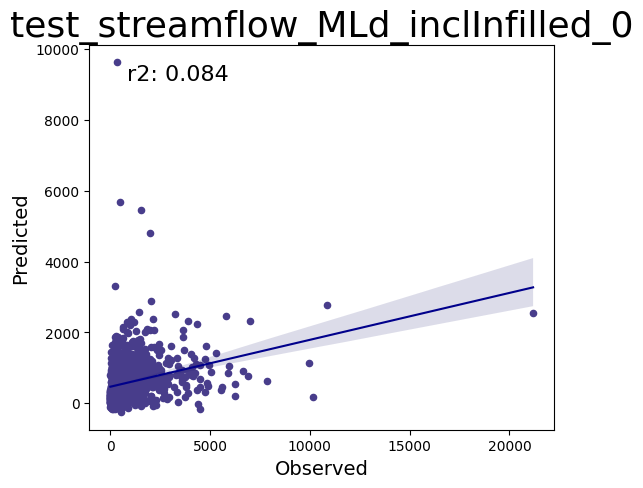

D:\mytools\AI4Water\ai4water\utils\visualizations.py:189: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  axis.plot(true, style, color='b', marker='o', fillstyle='none',  markersize=ms, label='True')
D:\mytools\AI4Water\ai4water\utils\visualizations.py:199: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.xticks(fontsize=18)
D:\mytools\AI4Water\ai4water\utils\plotting_tools.py:433: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(fname, dpi=dpi, bbox_inches=bbox_inches)
d:\c\anaconda3\envs\tfcpu21_py37\lib\site-packages\scipy\stats\stats.py:410: RuntimeWa

array([224.70468, 182.08243,  81.28467, ..., 207.23038, 874.7484 ,
       592.52264], dtype=float32)

d:\c\anaconda3\envs\tfcpu21_py37\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(bytes_io, **kw)


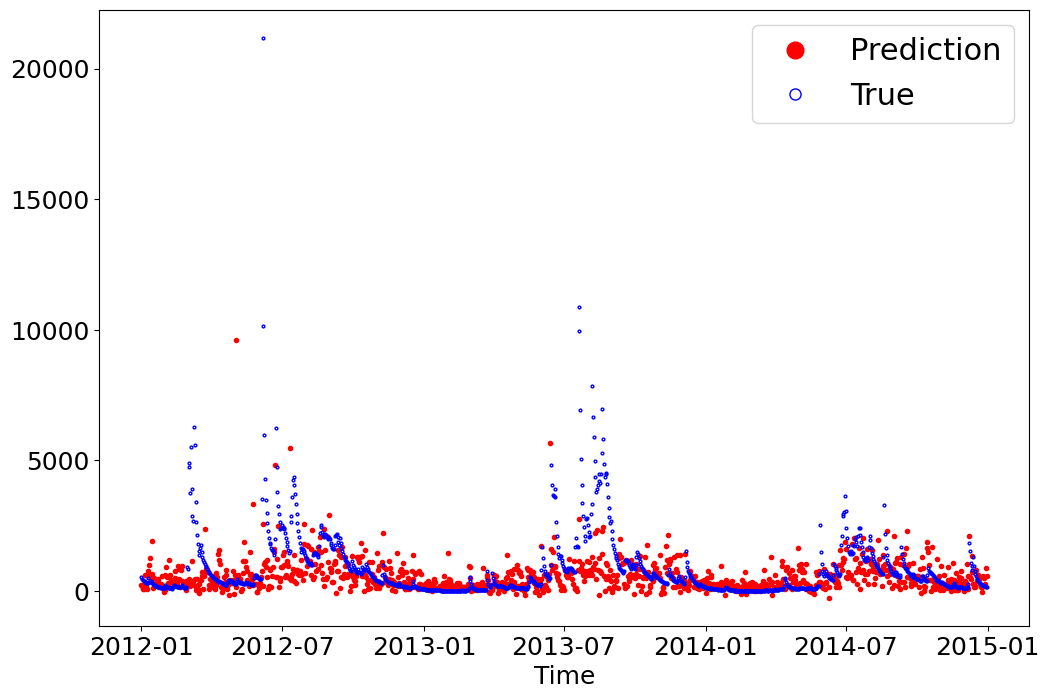

In [23]:
model.predict()

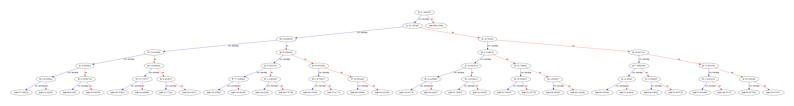

In [24]:
visualizer = model.view()

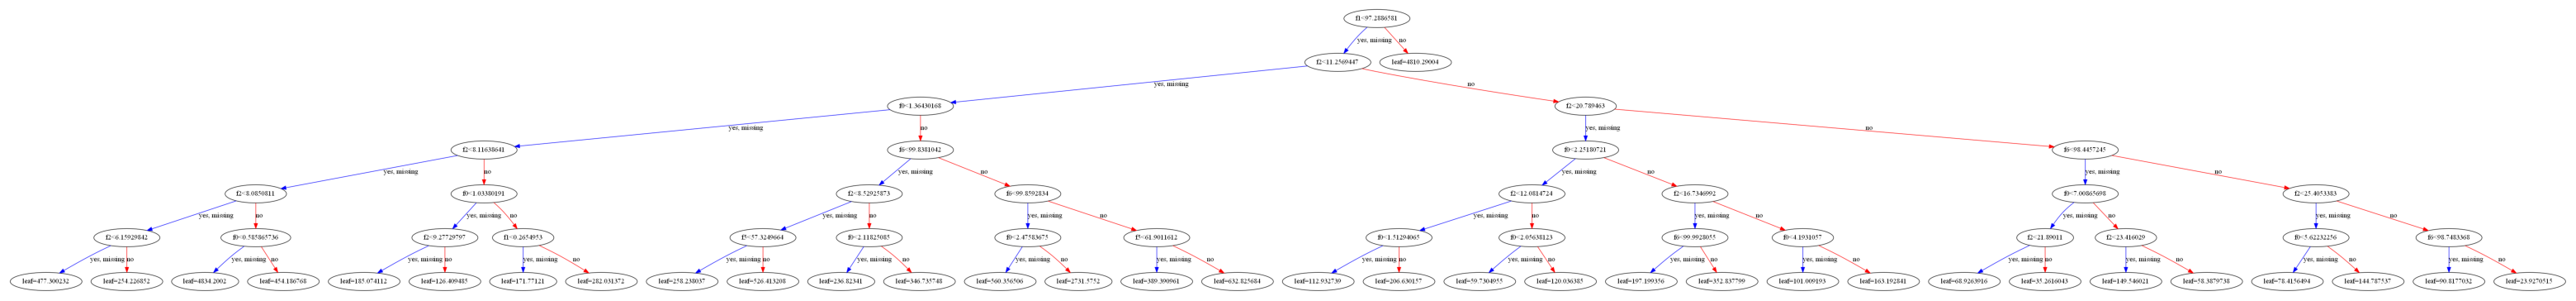

In [25]:
visualizer.decision_tree(figsize=(40, 40))